In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# get_ipython().run_line_magic('matplotlib', 'inline')
# import seaborn as sns
# sns.set() # Setting seaborn as default style even if use only matplotlib
import GPy
import argparse
import sys 
import os
os.environ['PYTHONHASHSEED'] = '0'
plt.rcParams.update({'font.size': 9})

In [2]:
seed = 42

# Toy prob

In [3]:
np.random.seed(seed=seed)

In [4]:
g = lambda x: (-np.sin(10.0*np.pi*(x+1))/(2*x+1))-x**4
f = lambda x: (np.cos(g(x))**2)+np.sin(3*x)
std_dev_g = 0.2
std_dev_f = 0.1

In [5]:
''' Test data '''
X_p = np.linspace(0.0, 1.0, 150)[:,None]
z_p = g(X_p) + std_dev_g * np.random.RandomState(seed=seed).randn(*g(X_p).shape) # inexpensive measurements
y_p = f(X_p) + std_dev_f * np.random.RandomState(seed=seed).randn(*f(X_p).shape) # expensive measurements

(60, 1) (60, 1)
(20, 1) (20, 1)


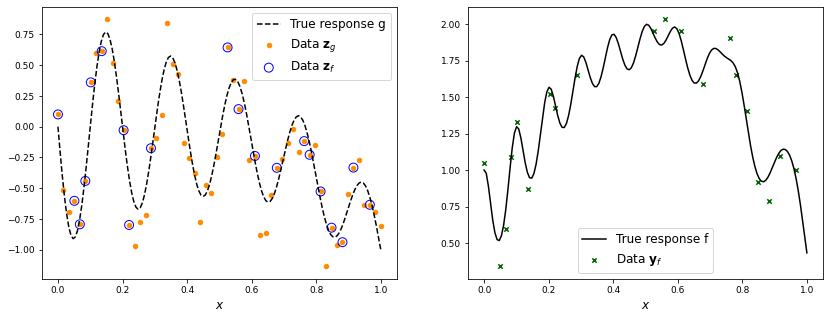

In [6]:
''' Train data '''
N_g = 60
N_f = 20

X_g = np.linspace(0, 1, N_g)[:,None]
z_g = g(X_g) + std_dev_g * np.random.RandomState(seed=seed).randn(*g(X_g).shape)

# for nested data
perm = np.random.RandomState(seed=seed).permutation(N_g)
X_f = X_g[perm[0:N_f]]
z_f = z_g[perm[0:N_f]]
y_f = f(X_f) + std_dev_f * np.random.RandomState(seed=seed).randn(*f(X_f).shape)

print (X_g.shape, z_g.shape)
print (X_f.shape, y_f.shape)


plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(X_p, g(X_p), 'k--', label="True response g")
plt.scatter(X_g, z_g, s=20, color='darkorange', marker='o', label=r"Data $\mathbf{z}_g$")
plt.scatter(X_f, z_f, s=80, facecolors='none', edgecolors='b', label=r"Data $\mathbf{z}_f$")
plt.xlabel('$x$', fontsize=12)
# plt.ylabel('$y$', fontsize=12)
plt.legend(loc="best", fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(X_p, f(X_p), 'k-', label='True response f')
plt.scatter(X_f, y_f, s=20, color='darkgreen', marker='x', label=r"Data $\mathbf{y}_f$")
plt.xlabel('$x$', fontsize=12)
# plt.ylabel('$y$', fontsize=12)
plt.legend(loc="best", fontsize=12)

plt.savefig('data.pdf',dpi=300)
plt.show()
plt.close()